In [7]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import fetch_california_housing

In [14]:
california = fetch_california_housing()
california

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [15]:
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [20]:
#load the dataset

X = california.data
y = california.target

In [23]:
#create dataframe

columns = california.feature_names
df = pd.DataFrame(X, columns = columns)
df['Target'] = y

df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [24]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [25]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [28]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Target        0
dtype: int64

In [29]:
#split the dataset
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [33]:
#create knn regressor

n_neighbors =5
knn = KNeighborsRegressor(n_neighbors =n_neighbors)



In [34]:
#fit the model
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [36]:
#predict
y_pred = knn.predict(X_test)
y_pred

array([2.1472, 2.4428, 1.5632, ..., 1.8056, 2.6622, 1.9206])

In [38]:
#Evaluate
mse = mean_squared_error(y_test, y_pred)
mse

1.1266774327969193

In [43]:
# Randomly sample 100 points
np.random.seed(42)
sample_indices = np.random.choice(len(X_test), 100, replace=False)
X_test_sample = X_test[sample_indices]
y_test_sample = y_test[sample_indices]
y_pred_sample = y_pred[sample_indices]

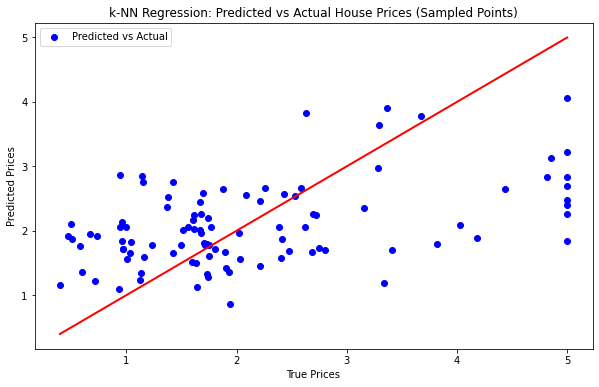

In [48]:
#plot the result
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(y_test_sample, y_pred_sample, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test_sample), max(y_test_sample)], [min(y_test_sample), max(y_test_sample)], color='red', lw=2)
plt.title('k-NN Regression: Predicted vs Actual House Prices (Sampled Points)')
plt.xlabel('True Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

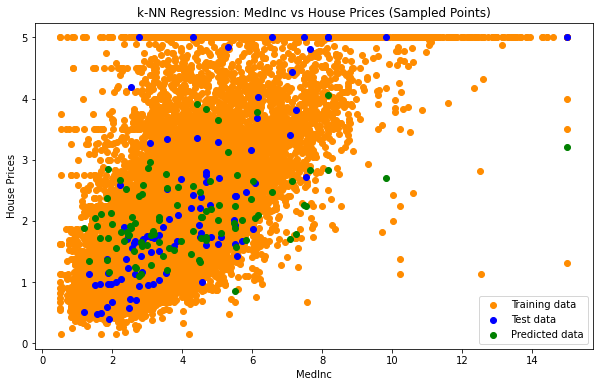

In [50]:
# Create scatter plot for one feature vs. target
feature_index = 0  # Index of the feature you want to visualize (e.g., MedInc is at index 0)
feature_name = columns[feature_index]

plt.figure(figsize=(10, 6))
plt.scatter(X_train[:, feature_index], y_train, color='darkorange', label='Training data')
plt.scatter(X_test_sample[:, feature_index], y_test_sample, color='blue', label='Test data')
plt.scatter(X_test_sample[:, feature_index], y_pred_sample, color='green', label='Predicted data')
plt.title(f'k-NN Regression: {feature_name} vs House Prices (Sampled Points)')
plt.xlabel(feature_name)
plt.ylabel('House Prices')
plt.legend()
plt.show()


## Pair plot

Displays scatter plots for each pair of features and the target variable.

In [54]:
import seaborn as sns

sampled_df = pd.DataFrame(X_test_sample, columns = columns)
sampled_df['Target'] = y_test_sample
sampled_df['Predicted'] = y_pred_sample

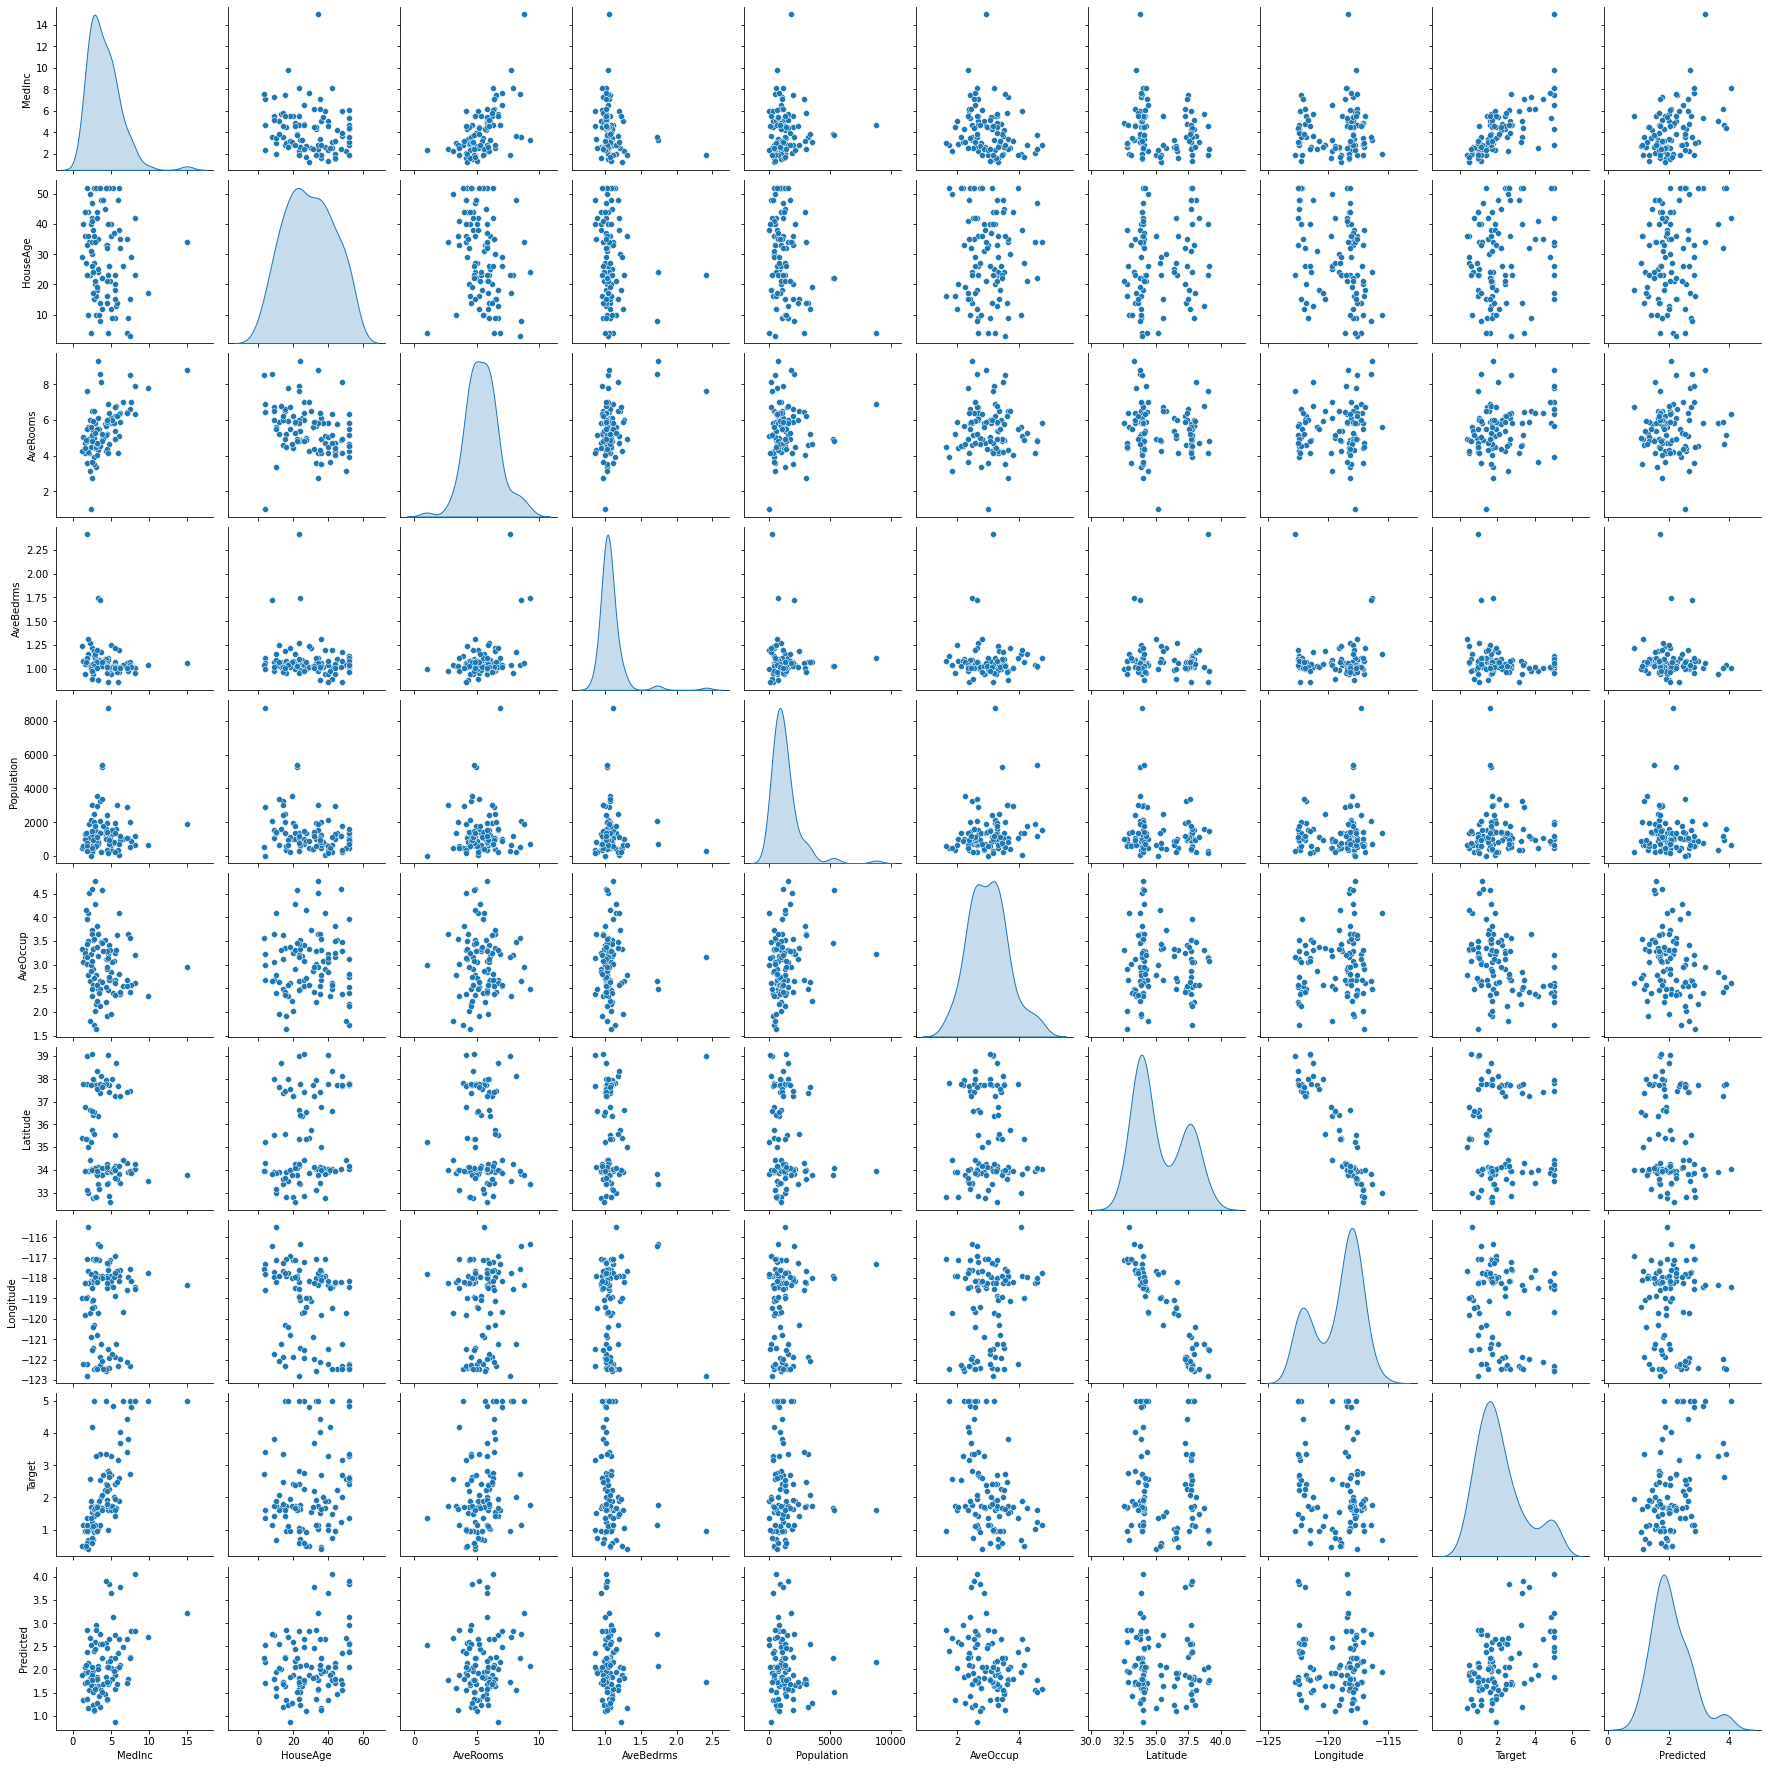

In [55]:
sns.pairplot(sampled_df, diag_kind='kde')
plt.show()

##  Residual Plot: 
    
Highlights the errors in predictions (residuals).

In [56]:
residuals = y_test_sample - y_pred_sample

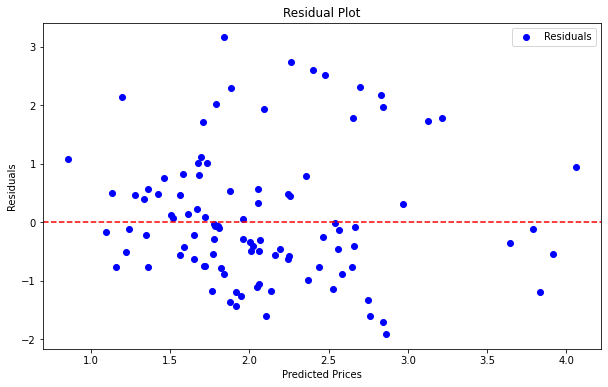

In [58]:
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_sample, residuals, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Predicted Prices')
plt.ylabel('Residuals')
plt.legend()
plt.show()

In [62]:
# Create a DataFrame with actual and predicted values
results_df = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred
})

# Add a column for the absolute error
results_df['Error'] = np.abs(results_df['Actual'] - results_df['Predicted'])


In [63]:
# Sort the DataFrame by the absolute error
sorted_results_df = results_df.sort_values(by='Error')

# Display the best and worst predictions
print("Best Predictions:")
print(sorted_results_df.head(10))

print("\nWorst Predictions:")
print(sorted_results_df.tail(10))


Best Predictions:
       Actual  Predicted     Error
1383  5.00001   5.000010  0.000000
1477  2.10200   2.101800  0.000200
486   2.75000   2.749002  0.000998
2172  1.81300   1.814000  0.001000
1629  2.27400   2.272800  0.001200
2010  1.63200   1.630600  0.001400
57    1.60100   1.602800  0.001800
3613  2.02700   2.024800  0.002200
652   1.29200   1.294400  0.002400
3978  2.32900   2.326400  0.002600

Worst Predictions:
       Actual  Predicted    Error
579   5.00001     1.4784  3.52161
2112  5.00001     1.4780  3.52201
2749  5.00001     1.4766  3.52341
3553  5.00001     1.4200  3.58001
1737  5.00000     1.4082  3.59180
3501  4.75000     1.1392  3.61080
286   5.00001     1.2616  3.73841
3869  5.00001     1.1516  3.84841
2565  5.00001     0.8242  4.17581
3569  5.00001     0.7926  4.20741


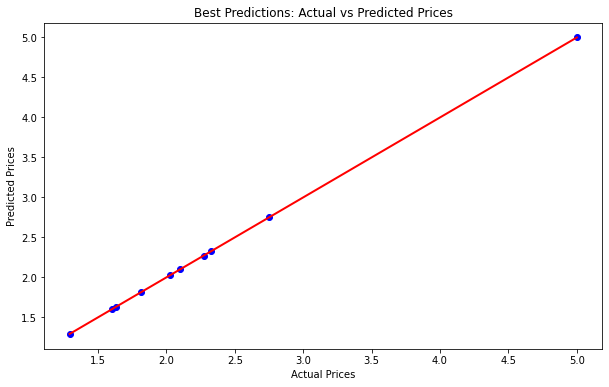

In [64]:
best_predictions = sorted_results_df.head(10)
plt.figure(figsize=(10, 6))
plt.scatter(best_predictions['Actual'], best_predictions['Predicted'], color='blue')
plt.plot([best_predictions['Actual'].min(), best_predictions['Actual'].max()],
         [best_predictions['Actual'].min(), best_predictions['Actual'].max()], color='red', lw=2)
plt.title('Best Predictions: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


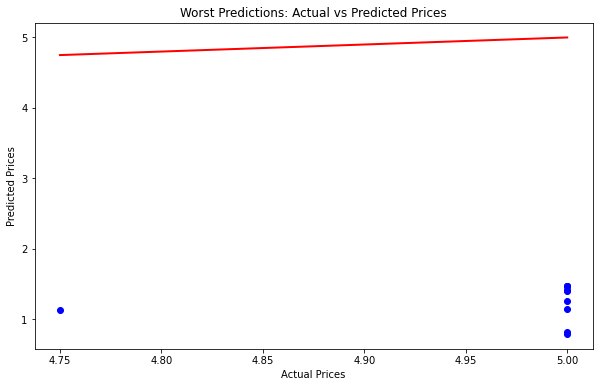

In [65]:
worst_predictions = sorted_results_df.tail(10)
plt.figure(figsize=(10, 6))
plt.scatter(worst_predictions['Actual'], worst_predictions['Predicted'], color='blue')
plt.plot([worst_predictions['Actual'].min(), worst_predictions['Actual'].max()],
         [worst_predictions['Actual'].min(), worst_predictions['Actual'].max()], color='red', lw=2)
plt.title('Worst Predictions: Actual vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()
